In [3]:
import context
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import keras as k
import ast
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, LocallyConnected1D
import matplotlib.pyplot as plt
%matplotlib inline

encode = context.encode_sequences
organize = context.organize_data

In [7]:
def encode_data(datapath):
    """
    This function reads in a file and outputs a file with each of the
    sequences encoded.
    Input: file path
    Output: file consisting of encoded sequences
    (encoded by scripted from encode_sequences file)
    """
    en_data = encode.encode_sequences_with_method(datapath)
    return en_data

In [8]:
data = '/Users/Meenakshi Krishnan/Documents/DIRECT/Capstone/yeastpro/ExpressYeaself/example/processed_data/20190612130111781831_percentiles_els_binarized_homogeneous_deflanked_sequences_with_exp_levels.txt.gz'
organize.create_sample_data(data, 10000)

AssertionError: Input file does not exist.

In [9]:
en_data = encode_data(data)

AssertionError: Input file does not exist.

In [14]:
def data_to_df(en_data):
    """
    This function reads in the file with encoded sequences and
    converts it into a dataframe, easily accessible by python tools.
    Input: file with encoded sequences
    Output:dataframe
    """
    proxy_df = pd.read_csv(en_data, names=['raw_sequence', 'ex_levels'], sep='\t')
    return proxy_df

In [24]:
proxy_df = data_to_df(en_data)

In [110]:
def store_expression_levels(proxy_df):
    """
    This function reads in the dataframe of encoded sequences and
    scales and stores the expression levels as a separate variable.
    Input: dataframe
    Output: np.array of scaled expression levels
    """
    expression_levels = np.array(proxy_df['ex_levels'])
    
#     scaler = preprocessing.MinMaxScaler()
#     reshaped = ex_levels.reshape((len(ex_levels), 1))
#     expression_levels = scaler.fit_transform(reshaped)
    
    return expression_levels

In [111]:
expression_levels = store_expression_levels(proxy_df)
print(expression_levels)

[ 1.         10.          8.51420455 ...  4.         11.
  8.        ]


In [112]:
def store_sequence_matrix(proxy_df):
    """
    This function reads in the dataframe of encoded sequences, consisting
    of "raw matrices" per sequence, and converts and stores them all within
    a (3-dimensional) np.array of each matrix per sequence. This will allow
    the data to be better read by neural network objects.
    Input: dataframe
    Output: np.array consisting of all sequence matricies (3-dimensional array)
    """
    sequence_matrix = []

    for sequence in proxy_df['raw_sequence']:
        array_seq = np.array(ast.literal_eval(sequence))
        sequence_matrix.append(array_seq)
    
    sequence_matrix = np.array(sequence_matrix)
    
    return sequence_matrix

In [122]:
sequence_matrix = store_sequence_matrix(proxy_df)
type(sequence_matrix)

numpy.ndarray

In [114]:
def data_shape(sequence_matrix):
    """
    This function reads in the np.array sequence matrix and outputs its
    dimensions. 
    Input: np.array
    Output: tuple consisting of the dimensions of the input matrix
    """
    shape = sequence_matrix.shape
    return shape

In [123]:
shape = data_shape(sequence_matrix)
type(shape)

tuple

In [116]:
def plot_results(fit):
    """
    This function takes the results from the model fit and evaluations
    and returns a visualization for the test-train accuracies and model
    losses.
    Input: model.fit() object results, specifically accuracies and 
    losses of the train and test data
    Output: matplotlib graphical visualizations of each
    """
    # Create plot with subplots
    fig, ax = plt.subplots(1, 2, figsize=(12,10))

    # Plot the accuracy plot
    ax1 = plt.subplot(221, xlabel='Epoch', ylabel='Accuracy', title='Model Accuracy Plot')
    ax1.plot(fit['acc'], color='goldenrod', lw=2, alpha=0.5)
    ax1.plot(fit['val_acc'], color='rebeccapurple', lw=2, alpha=0.5)

    # Plot the loss plot
    ax2 = plt.subplot(222, xlabel='Epoch', ylabel='Loss', title='Model Loss Plot')
    ax2.plot(fit['loss'], color='goldenrod', lw=2, alpha=0.5)
    ax2.plot(fit['val_loss'], color='rebeccapurple', lw=2, alpha=0.5)


    # create a list to store the axes
    axes_list = [ax1, ax2]
    # edit common components using a for loop
    for ax in axes_list:
        ax.title.set_fontsize(20) 
        ax.xaxis.label.set_fontsize(14) 
        ax.yaxis.label.set_fontsize(14)
        ax.legend(['Train', 'Test'], loc='upper left')

    return ax1, ax2

In [117]:
def tt_split(sequence_matrix, expression_levels):
    """
    This function reads in the np.array sequence matrix and expressions levels
    and performs a test-train split on the data.
    Input: np.array sequence matrix and expression levels
    Output: train_x, test_x, train_y, test_y
    """
    train_x, test_x, train_y, test_y = train_test_split(sequence_matrix, expression_levels, test_size=0.25)
    return train_x, test_x, train_y, test_y

In [ ]:
# Define the model parameters
batch_size = len(y_scaled) * 0.01 # no bigger than 1 % of data
filters = 15
# kernel_size
strides = 1
epochs = 10
dropout = 0.1
num_layers = 10

# Define the inputs
inputs = Input(shape=(max_sequence_len, 5))
layers = []

# Build up the layers
for i in range(1, num_layers + 1):
    layer = Conv1D(filters, (2 * i - 1), strides)(inputs)
    layers.append(layer)

# Combine the layers
combined = Concatenate(axis=1)(layers)

# Add some flatten, dense, and dropout layers
out = Flatten()(combined)
# out = Dropout(dropout)(out)
out = Dense(500, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(1, activation='sigmoid')(out)
out = Dropout(dropout)(out)

# Define the model with inputs and outputs, and compile.
model = Model(inputs=inputs, outputs=out)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

In [118]:
def loc_con_1d_model(filters, kernel_size, strides, input_x, input_y, drop_rate, dense_units1, dense_units_final, optimizer, loss):
    """
    This function reads in various parameters to compiles a LocallyConnected1D
    model, consisting of various layers including Dropout, Flatten and
    Dense. The function returns the model summary.
    Input: Various parameters including filter size, kernel size, number
    of strides, x and y dimensional input values, dropout rate (for Dropout
    Layers), dense units (for Dense Layers) and the optimizer and loss
    methods for the model.compile function.
    Output: model summary (based on model.summary() object)
    """
    # make a global variable
    global model
    
    # initialize model
    model = Sequential()
    model.add(LocallyConnected1D(filters, kernel_size, strides=strides, input_shape=(input_x, input_y), activation='relu'))
    
    # additional layers
#     model.add(Dense(50))    
#     model.add(Dropout(drop_rate))
#     model.add(LocallyConnected1D(50, 15, activation='relu'))
#     model.add(Dense(10))  
#     model.add(Dropout(drop_rate))
#     model.add(Dense(10))  
#     model.add(Dropout(drop_rate))
    model.add(Dense(dense_units)) 
    model.add(Dropout(drop_rate))
    
    # final flatten and dense layers
    model.add(Flatten())
    model.add(Dense(dense_units_final))
    
    # compile model
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae', 'acc'])
    
    # return model summary
    return(model, model.summary())

In [119]:
loc_con_1d_model(100, 20, 1, 257, 5, 0.5, 10, 1, 'adam', 'mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_6 (Local (None, 238, 100)          2403800   
_________________________________________________________________
dense_9 (Dense)              (None, 238, 1)            101       
_________________________________________________________________
dropout_6 (Dropout)          (None, 238, 1)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 238)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 239       
Total params: 2,404,140
Trainable params: 2,404,140
Non-trainable params: 0
_________________________________________________________________


(<keras.engine.sequential.Sequential at 0x1cabe9e8eb8>, None)

In [120]:
def model_eval(sequence_matrix, expression_levels, epochs, batch_size):
     """
    This function fits the LocallyConnected1D model, generated in the 
    loc_con_1d_model() function, using given train and test data sets. The
    model evaluates acccuracy and loss scores and outputs these values
    as well as a graphical visualization by calling the plot_results()
    function and passing through these values.
    Input: sequence_matrix and expression_level arrays, number of epochs
    to run the model for, and batch size (number of samples to train)
    Output: accuracy and loss values, accuracy and loss graphs
    """
    # initialize training and testing values
    train_x, test_x, train_y, test_y = tt_split(sequence_matrix, expression_levels)
    
    # fit model
    fit = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y))
    
    # evaluate model (run tests)
    scores = model.evaluate(test_x, test_y)
    
    # plot results
    plt = plot_results(fit.history)
    #plt.show()
    
    # return model accuracy
    return("Values: "+ str(model.metrics_names[0]) + ': ' + str(scores[0]) + ' ' + str(model.metrics_names[2]) + ': ' + str(scores[2]*100) + '%')

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 13s 2ms/step - loss: 15.0179 - mean_absolute_error: 3.1204 - acc: 0.0775 - val_loss: 12.3927 - val_mean_absolute_error: 2.9065 - val_acc: 0.0584
Epoch 2/10
7500/7500 [==============================] - 9s 1ms/step - loss: 11.8242 - mean_absolute_error: 2.7873 - acc: 0.0843 - val_loss: 11.5211 - val_mean_absolute_error: 2.7853 - val_acc: 0.0748
Epoch 3/10
7500/7500 [==============================] - 9s 1ms/step - loss: 11.1242 - mean_absolute_error: 2.6851 - acc: 0.0905 - val_loss: 11.2775 - val_mean_absolute_error: 2.7152 - val_acc: 0.0864
Epoch 4/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.9327 - mean_absolute_error: 2.6513 - acc: 0.0936 - val_loss: 11.0215 - val_mean_absolute_error: 2.6957 - val_acc: 0.0864
Epoch 5/10
7500/7500 [==============================] - 9s 1ms/step - loss: 10.8895 - mean_absolute_error: 2.6478 - acc: 0.0899 - val_loss: 11.2502 - v

'Values: loss: 10.877972393798828 acc: 8.959999999999999%'

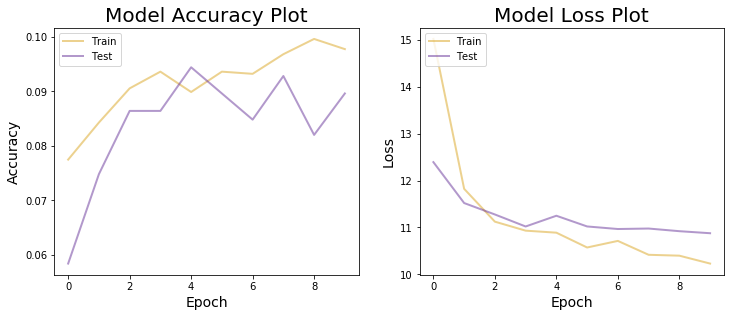

In [121]:
model_eval(sequence_matrix, expression_levels, 10, 100)